# Tutoriel DASK - Rennes, 27 août 2019

# Pourquoi dask?

- Faire des calculs dans machines multi-coeur et dans clusters.
- Bibliothèque facile à comprendre et basé sur d’autres bibliothèques python.
- A dashboard pour vérifier la situation d'exécution du code.
- Bibliothèque OpenSource. 

# La bibliothèque DASK

- Blocked algorithme (diviser en petites morceaux)
- Larger than memory algorithme (minimizer l’empreinte mémoire)
- Parallel (Utilise plus qu'une coeur)

# Graphes de calcul
- Exprimer une graphe de calcul
- Visualizer une graphe de calcul
- Faire la computation d'une graphe de calcul

In [1]:
#Exemple code python

def inc(i):
    return i + 1
 
def add(a,b):
    return a + b

x = 1
y = inc(x)
z = add(y, 10)
print(z)

12


In [2]:
#Le même code python d'avant avec le graphe de calcul construit par dask

from dask.multiprocessing import get
 
def inc(i):
    return i + 1
 
def add(a,b):
    return a + b

#Definition du graphe
dsk = {'x': 1,
     'y': (inc, 'x'),
     'z': (add, 'y', 10)}

get(dsk, 'z')

12

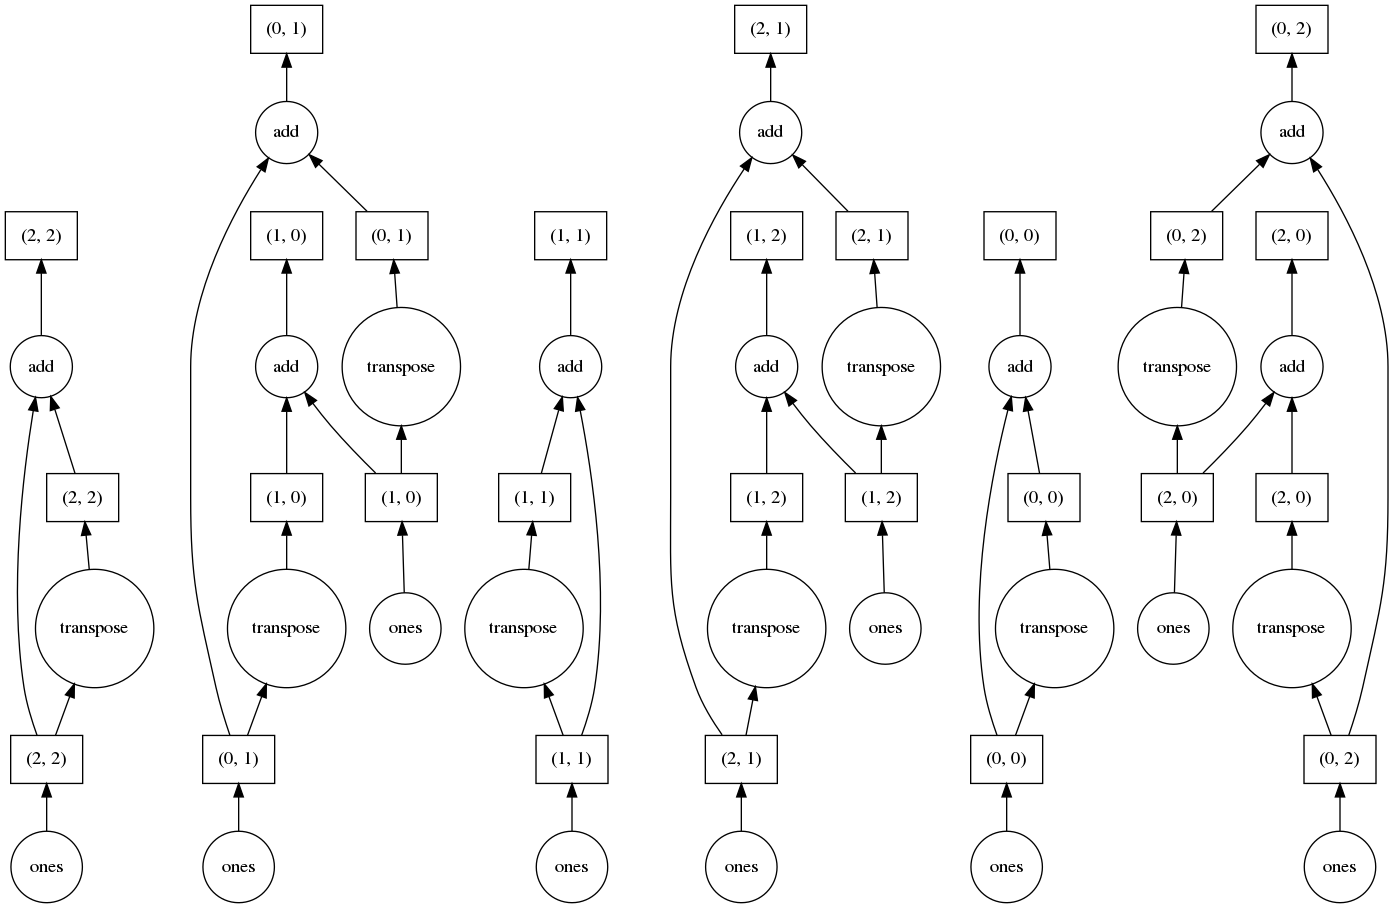

In [3]:
#Visualization d'une graphe de calcul

import dask.array as da
 
x = da.ones((15, 15), chunks=(5, 5))
y = x + x.T
y.visualize()

In [4]:
#Faire le calcul d'une code dask

import dask.array as da

x = da.ones((15, 15), chunks=(5, 5))
y = x + x.T
y.compute()

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2.

# DASK Array

- Code python avec et sans chunks
- Influence de la taille du chunk dans la performance du code

In [5]:
%%time

import numpy as np

x = np.random.normal(10, 0.1, size=(20000, 20000))
y = x.mean(axis=0)[::100]

CPU times: user 17.4 s, sys: 564 ms, total: 18 s
Wall time: 17.9 s


In [6]:
%%time

import dask.array as da

x = da.random.normal(10, 0.1, size=(20000, 20000), chunks=(1000, 1000))
y = x.mean(axis=0)[::100]
y.compute()

CPU times: user 25.1 s, sys: 226 ms, total: 25.3 s
Wall time: 7.22 s


In [7]:
%%time

import dask.array as da

x = da.random.normal(10, 0.1, size=(20000, 20000), chunks=(20000, 20000))
y = x.mean(axis=0)[::100]
y.compute()

CPU times: user 17 s, sys: 795 ms, total: 17.8 s
Wall time: 17.8 s


In [8]:
%%time

import dask.array as da

x = da.random.normal(10, 0.1, size=(20000, 20000), chunks=(25, 25))
y = x.mean(axis=0)[::100]
y.compute()

CPU times: user 4min 28s, sys: 1min 14s, total: 5min 42s
Wall time: 4min 43s


# Dask DataFrame
- Introductions avec des examples

In [7]:
import dask.dataframe as dd

df = dd.read_csv('DDataFrame/staderennais.csv')
df.head(len(df)) #L'en-tête du tableau avec les types

,Numero,Position,Pays (origine),Nom complet,Age,Seletion,ClubOrigine,DebutContrat,FinContrat
0,1,G,France,Romain Salin,35,–,Sporting Portugal,2019,2021
1,16,G,Sénégal,Édouard Mendy,27,Sénégal,Stade de Reims,2019,2023
2,30,G,République démocratique du Congo,Pépé Bonet,16,–,Stade de Rennes,2019,2022
3,3,D,France,Damien Da Silva Capitaine,31,France -19 ans,SM Caen,2018,2021
4,4,D,France,Gerzino Nyamsi,22,France -20 ans,LB Châteaurouxnote 26,2017,2024
5,5,D,Côte d'Ivoire,Souleyman Doumbia,22,Côte d'Ivoire,Grasshopper Club Zurich,2019,2022
6,15,D,Madagascar,Jérémy Morel,35,Madagascar,Olympique Lyonnais,2019,2020
7,26,D,France,Jérémy Gélin,22,France espoirs,Stade de Rennes,2016,2022
8,27,D,Mali,Hamari Traoré,27,Mali,Stade de Reims,2017,2021
9,31,D,France,Sacha Boey,18,France -18 ans,Stade de Rennes,2019,2022


In [13]:
df.mean().compute() #Moyennes des columnes ou il y a les numeros

Numero            19.066667
Age               23.233333
DebutContrat    2017.766667
FinContrat      2021.500000
dtype: float64

In [14]:
df.Age.mean().compute() #Moyenne des ages

23.233333333333334

In [15]:
df.loc[df['Numero']==1].compute() #Select une line ou le numero=1

,Numero,Position,Pays (origine),Nom complet,Age,Seletion,ClubOrigine,DebutContrat,FinContrat
0,1,G,France,Romain Salin,35,–,Sporting Portugal,2019,2021


In [16]:
df.iloc[:,1].compute() #Toutes les valeus de la première colonne

0     G
1     G
2     G
3     D
4     D
5     D
6     D
7     D
8     D
9     D
10    D
11    M
12    M
13    M
14    M
15    M
16    M
17    M
18    M
19    M
20    M
21    M
22    A
23    A
24    A
25    A
26    A
27    A
28    A
29    A
Name: Position, dtype: object

In [17]:
df.DebutContrat.compute() #Toutes les valeurs de la colonne "debutContrat"

0     2019
1     2019
2     2019
3     2018
4     2017
5     2019
6     2019
7     2016
8     2017
9     2019
10    2018
11    2018
12    2018
13    2018
14    2016
15    2017
16    2017
17    2018
18    2019
19    2013
20    2018
21    2018
22    2018
23    2018
24    2018
25    2018
26    2017
27    2018
28    2018
29    2018
Name: DebutContrat, dtype: int64

In [18]:
df.Age.max().compute() #La valeur maximalle des Ages

35

In [19]:
df.Age.value_counts().compute() #Compter l'aparition pour age

22    4
18    4
23    3
35    2
29    2
27    2
25    2
20    2
17    2
16    2
31    1
28    1
26    1
24    1
21    1
Name: Age, dtype: int64

In [20]:
df.loc[df['ClubOrigine']=='Stade de Rennes'].compute()

,Numero,Position,Pays (origine),Nom complet,Age,Seletion,ClubOrigine,DebutContrat,FinContrat
2,30,G,République démocratique du Congo,Pépé Bonet,16,–,Stade de Rennes,2019,2022
7,26,D,France,Jérémy Gélin,22,France espoirs,Stade de Rennes,2016,2022
9,31,D,France,Sacha Boey,18,France -18 ans,Stade de Rennes,2019,2022
10,38,D,France,Brandon Soppy,17,France -17 ans,Stade de Rennes,2018,2021
14,12,M,France,James Léa Siliki,23,France -19 ans,Stade de Rennes,2016,2021
17,18,M,Angola,Eduardo Camavinga,16,–,Stade de Rennes,2018,2022
20,34,M,France,Yann Gboho,18,France -17 ans,Stade de Rennes,2018,2021
21,37,M,France,Alexis Trouillet,18,France -18 ans,Stade de Rennes,2018,2021
28,32,A,France,Lucas Da Cunha,18,France -17 ans,Stade de Rennes,2018,2021
29,35,A,France,Georginio Rutter,17,France -16 ans,Stade de Rennes,2018,2021


In [10]:
df.loc[df['Pays (origine)']!='France'].compute()

,Numero,Position,Pays (origine),Nom complet,Age,Seletion,ClubOrigine,DebutContrat,FinContrat
1,16,G,Sénégal,Édouard Mendy,27,Sénégal,Stade de Reims,2019,2023
2,30,G,République démocratique du Congo,Pépé Bonet,16,–,Stade de Rennes,2019,2022
5,5,D,Côte d'Ivoire,Souleyman Doumbia,22,Côte d'Ivoire,Grasshopper Club Zurich,2019,2022
6,15,D,Madagascar,Jérémy Morel,35,Madagascar,Olympique Lyonnais,2019,2020
8,27,D,Mali,Hamari Traoré,27,Mali,Stade de Reims,2017,2021
11,6,M,Suède,Jakob Johansson,29,Suède,AEK Athènes,2018,2020
17,18,M,Angola,Eduardo Camavinga,16,–,Stade de Rennes,2018,2022
23,11,A,Sénégal,M'Baye Niang,24,Sénégal,Torino FC,2018,2023
27,25,A,Sénégal,Diafra Sakho,29,Sénégal,Bursaspor,2018,2020


# DASK Delayed
- Code sequentiel
- Code parallèlization
- Example de parallèlization de fonctions

In [1]:
%%time 

from time import sleep

def inc(x):
    sleep(1)
    return x+1

def add(x,y):
    sleep(1)
    return x+y

x = inc(1)
y = inc(2)
z = add(x,y)

CPU times: user 893 µs, sys: 149 µs, total: 1.04 ms
Wall time: 3 s


In [10]:
%%time

from time import sleep
from dask import delayed
 
def inc(x):
    sleep(1)
    return x+1
 
def add(x,y):
    sleep(1)
    return x+y
 

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x,y)
z.compute()

CPU times: user 7 ms, sys: 213 µs, total: 7.22 ms
Wall time: 2.04 s


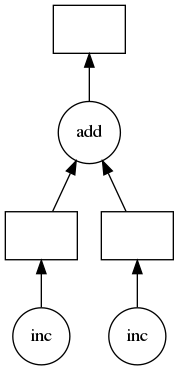

In [5]:
z.visualize()

In [7]:
import dask
from time import sleep

@dask.delayed
def inc(x):
    return x+1

@dask.delayed
def add(x,y):
    return x+y

a = inc(1)
b = inc(2)
c = add(a,b)

c.compute()

5

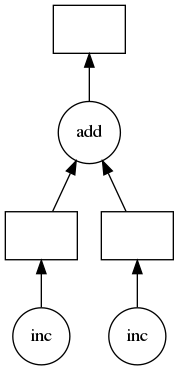

In [8]:
c.visualize()

# Dask Bag
- Introduction avec des exemples

In [9]:
def iseven(n):
    return n % 2 == 0

def squared(x):
    return x ** 2

map(squared, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

filter(iseven, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

[2, 4, 6, 8, 10]

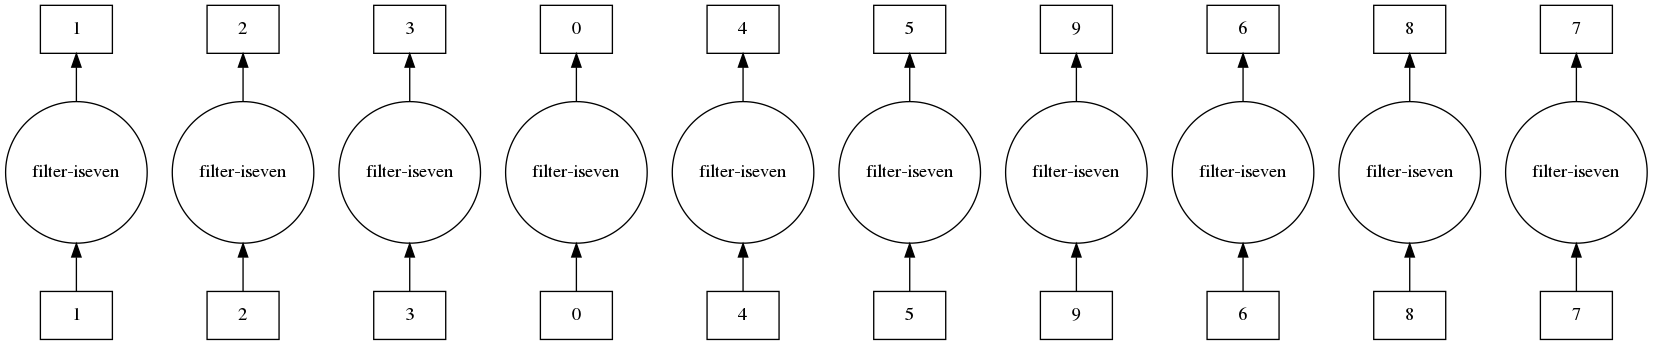

In [11]:
import dask.bag as db
 
def iseven(n):
    return n % 2 == 0

def squared(x):
    return x ** 2

b = db.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
b.map(squared).compute()
b.filter(iseven).compute()
b.filter(iseven).visualize()


# Analyse de performance
- Dask Graphes
- ProgressBar
- Profiler
- ResourceProfiler
- CacheProfiler
- Custom Callbacks
- Clients

In [12]:
#ProgressBar

from dask.diagnostics import ProgressBar
import dask.array as da 

a = da.random.normal(size=(10000, 10000), chunks=(1000, 1000))
res = (a.T + a).mean(axis=0)

with ProgressBar():
    out = res.compute()


[########################################] | 100% Completed |  2.4s


In [13]:
#Une autre option de ProgressBar

from dask.diagnostics import ProgressBar
import dask.array as da 

a = da.random.normal(size=(10000, 10000), chunks=(1000, 1000))
res = (a.T + a).mean(axis=0)

pbar = ProgressBar()
pbar.register()
out = res.compute()

pbar.unregister() 
pbar.last_duration 

[########################################] | 100% Completed |  2.4s


2.374725103378296

In [14]:
# Exemple Profiler
from dask.diagnostics import Profiler
import dask.array as da 

a = da.random.normal(size=(10000, 10000), chunks=(1000, 1000))
res = (a.T + a).mean(axis=0)

with Profiler() as prof:
    out = res.compute()
prof.visualize() 
prof.results

[TaskData(key=('mean_combine-partial-f5183b8ad7749b37ea2159114f11f3eb', 0, 6), task=(<functools.partial object at 0x7f7aa3013418>, [('mean_chunk-69fe9c44d97928f57d8b3029fd79ce4a', 0, 6), ('mean_chunk-69fe9c44d97928f57d8b3029fd79ce4a', 1, 6), ('mean_chunk-69fe9c44d97928f57d8b3029fd79ce4a', 2, 6), ('mean_chunk-69fe9c44d97928f57d8b3029fd79ce4a', 3, 6)]), start_time=1566897599.106905, end_time=1566897599.108392, worker_id=140165217515264),
 TaskData(key=('normal-94f0e2a145457432f159a1afb104cde4', 4, 0), task=(<function _apply_random at 0x7f7acd377320>, None, 'normal', array([1170975590, 3144147667,  486300746, 2633607880, 1593991571,
        2553786399,  680969947, 3762170714, 4236807263, 1450211715,
         757337282,   15299134, 1820627619, 2137563318, 2791310446,
        2295719582, 2075464059, 3985800558, 2736472428, 1957840153,
        3483727641, 2265078739, 3062239934, 4103505537,  505059320,
         928885443, 3202175305,  828783916, 2571376013, 2934852053,
         691356893, 25

In [15]:
#Exemple 1 - ResourceProfiler

from dask.diagnostics import ResourceProfiler
import dask.array as da 

a = da.random.normal(size=(10000, 10000), chunks=(1000, 1000))
res = (a.T + a).mean(axis=0)

with ResourceProfiler() as rprof: 
    out = res.compute()
rprof.visualize() 
rprof.results 

[ResourceData(time=1566897732.607518, mem=364.888064, cpu=0.0),
 ResourceData(time=1566897733.639439, mem=389.607424, cpu=313.0),
 ResourceData(time=1566897734.640794, mem=389.677056, cpu=329.5)]

In [16]:
#Exemple 2 - ResourceProfiler

from dask.diagnostics import ResourceProfiler
import dask.array as da 

a = da.random.normal(size=(10000, 10000), chunks=(1000, 1000))
res = (a.T + a).mean(axis=0)

with ResourceProfiler(dt=0.5) as rprof:
    out = res.compute()
rprof.visualize() 

Figure(id='1412', ...)

In [17]:
#Exemple 1 - CacheProfiler

from dask.diagnostics import CacheProfiler
import dask.array as da 
 
a = da.random.normal(size=(10000, 10000), chunks=(1000, 1000))
res = (a.T + a).mean(axis=0)

with CacheProfiler() as cprof: 
    out = res.compute()
cprof.visualize() 
cprof.results 

[CacheData(key=('normal-affa273fe63f529a823e6f0fe9bf19a3', 4, 1), task=(<function _apply_random at 0x7f7acd377320>, None, 'normal', array([3404081844, 3500528159, 4254384930, 1696137965, 3082119798,
        2655296473, 2394127114, 2702644866, 4056047208, 3342403095,
        4000279442, 2308422608, 4004686040, 1420615131, 1534414925,
        1367343270, 1917908628, 4275383166, 3367861946, 2870059913,
         933256421, 4201458917,  626557936, 3532606770,  760754059,
        2760190139,  693594782, 2617897392, 1932202610, 3803871717,
        3001901561, 1062820028, 3200303942, 1942965410, 3327157456,
        3573657831, 3904671783,  353093069, 1455670575, 2379753740,
        1947947008, 1864762971, 2002402809, 1866525768, 1119831642,
        1574339937, 2885485806, 2048543790, 1969760131, 3734924152,
        3409401139,  444045870, 1337858483, 2449622928, 2669189811,
        1130925448, 4132902554,  986064890, 2023247637, 3563633406,
        2173888733,  358136607,  806617667, 356956763

In [18]:
#Exemple 2 - CacheProfiler

from dask.diagnostics import CacheProfiler
import dask.array as da 
from cachey import nbytes
 
a = da.random.normal(size=(10000, 10000), chunks=(1000, 1000))
res = (a.T + a).mean(axis=0)

with CacheProfiler(metric=nbytes) as cprof:
    out = res.compute()
cprof.visualize() 

Figure(id='1995', ...)

In [19]:
from dask.diagnostics import ProgressBar, Profiler, ResourceProfiler, CacheProfiler, visualize
import dask.array as da 
 
a = da.random.normal(size=(10000, 10000), chunks=(1000, 1000))
res = (a.T + a).mean(axis=0)
pbar = ProgressBar()

with pbar, Profiler() as prof, ResourceProfiler() as rprof, CacheProfiler() as cprof: 
    out = res.compute()
visualize([prof, rprof, cprof]) #L'ordre ici c'est l'ordre de l'image

[########################################] | 100% Completed |  2.5s


Column(id='2549', ...)

In [20]:
# Exemple Custom Callbacks

from dask.callbacks import Callback
import dask.array as da 
 
a = da.random.normal(size=(10000, 10000), chunks=(1000, 1000))
res = (a.T + a).mean(axis=0)

class PrintKeys(Callback):
    def _pretask(self, key, dask, state):
        """Print the key of every task as it's started"""
        print("Computing: {0}!".format(repr(key)))

with PrintKeys():
    res.compute()

Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 0, 4)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 4, 0)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 1, 4)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 4, 1)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 1, 5)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 5, 1)!
Computing: ('mean_chunk-0c65e694b13e8d00879af2b374eeef7b', 1, 4)!
Computing: ('mean_chunk-0c65e694b13e8d00879af2b374eeef7b', 0, 4)!
Computing: ('mean_chunk-0c65e694b13e8d00879af2b374eeef7b', 4, 0)!
Computing: ('mean_chunk-0c65e694b13e8d00879af2b374eeef7b', 4, 1)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 0, 5)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 5, 0)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 2, 5)!
Computing: ('mean_chunk-0c65e694b13e8d00879af2b374eeef7b', 1, 5)!
Computing: ('mean_chunk-0c65e694b13e8d00879af2b374eeef7b', 5, 1)!
Computing: ('mean_chunk-0c65e694b13e8d00879af2

Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 9, 7)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 2, 9)!
Computing: ('mean_chunk-0c65e694b13e8d00879af2b374eeef7b', 6, 9)!
Computing: ('mean_chunk-0c65e694b13e8d00879af2b374eeef7b', 9, 6)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 9, 2)!
Computing: ('mean_chunk-0c65e694b13e8d00879af2b374eeef7b', 7, 9)!
Computing: ('mean_chunk-0c65e694b13e8d00879af2b374eeef7b', 9, 7)!
Computing: ('mean_combine-partial-a4b7c783a72ac9374c96dcb1a98a5f18', 2, 6)!
Computing: ('mean_agg-aggregate-f4aec881bcf406f7f7d7644f9ed83853', 6)!
Computing: ('mean_combine-partial-a4b7c783a72ac9374c96dcb1a98a5f18', 1, 9)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 3, 9)!
Computing: ('mean_combine-partial-a4b7c783a72ac9374c96dcb1a98a5f18', 2, 7)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 9, 3)!
Computing: ('mean_agg-aggregate-f4aec881bcf406f7f7d7644f9ed83853', 7)!
Computing: ('normal-db6a4f25412737cecfd21abaa10d7a2a', 8

In [1]:
from dask.diagnostics import ProgressBar
import dask.array as da 
from dask.distributed import Client, progress
 
client = Client()
a = da.random.normal(size=(10000, 10000), chunks=(1000, 1000))
res = (a.T + a).mean(axis=0)

#res.compute()
res = res.persist()
progress(res)

VBox()

In [2]:
client

Client Scheduler: tcp://127.0.0.1:38457 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 8.28 GB


# Étude de cas
- Filtre de Wiener
- Huber